In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir("/kaggle/input")

['icr-identify-age-related-conditions']

In [3]:
df = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")

In [4]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [7]:
df['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [8]:
def full_pipeline(df, numeric_columns=None, categorical_columns=None, date_column=None,
                          columns_to_upper=None, columns_to_lower=None):

            if date_column is not None:
                df[date_column] = pd.to_datetime(df[date_column])

            if numeric_columns is not None:
                for column in numeric_columns:
                    df[column].fillna(df[column].mean(), inplace=True)
                    
            if categorical_columns is not None:
                df = pd.get_dummies(df, columns=categorical_columns)

            if columns_to_upper is not None:
                for column in columns_to_upper:
                    df[column] = df[column].str.upper()

            if columns_to_lower is not None:
                for column in columns_to_lower:
                    df[column] = df[column].str.lower()

            #df_scaled = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())

            return df

In [9]:
df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [10]:
numeric_columns = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']
categorical_columns = ['EJ']

df = full_pipeline(df, numeric_columns, categorical_columns, date_column=None,
                          columns_to_upper=None, columns_to_lower=None)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [12]:
df_numeric = df[['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']]

<Axes: ylabel='Class'>

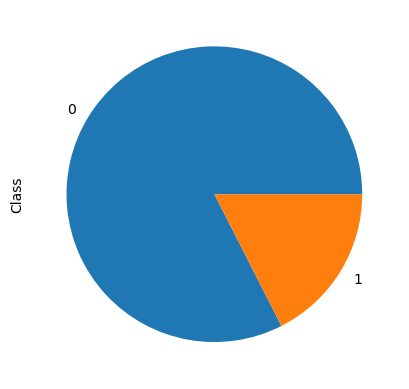

In [13]:
plot_df = df.Class.value_counts()
plot_df.plot(kind="pie")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/1911544441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

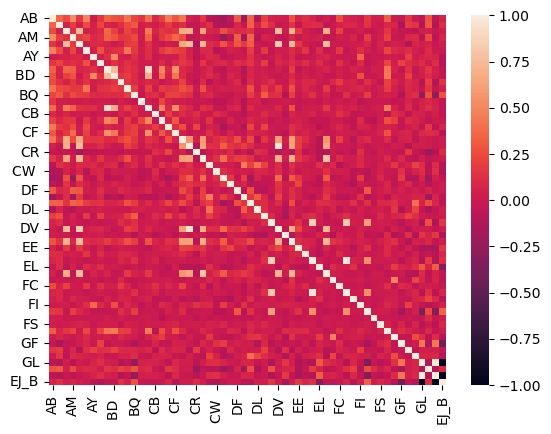

In [14]:
import seaborn as sns

sns.heatmap(df.corr())

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

remaining_columns = list(df.columns.drop(numeric_columns))


numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Create the column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_columns)
], remainder='passthrough')  # Include remaining columns as-is)

transformed_data = preprocessor.fit_transform(df)

numeric_column_names = preprocessor.transformers_[0][2]

# Create a new DataFrame with the transformed columns and the remaining columns from the original DataFrame
new_columns = list(numeric_column_names) + remaining_columns
df_transformed = pd.DataFrame(transformed_data, columns=new_columns)

In [16]:
df_transformed

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,Id,Class,EJ_A,EJ_B
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-0.940094,-0.41026,-0.655511,-0.948991,0.531241,-0.815752,000ff2bfdfe9,1,0,1
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,-1.14507,-0.41026,0.687893,-0.238862,-0.509218,1.304239,007255e47698,0,1,0
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,-0.104787,-0.071089,...,1.637944,-0.29921,-0.05185,-0.351743,-0.424754,-0.808323,013f2bd269f5,0,0,1
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.72961,-0.083417,0.112088,-0.104787,-0.391109,...,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.812311,043ac50845d5,0,0,1
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,1.445139,0.125327,...,-0.432313,0.09992,-0.318309,1.409422,-0.395228,-0.818054,044fb8a146ec,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,-0.699975,-0.161828,0.040232,-0.422762,0.275215,-0.802577,0.040875,-0.464891,-0.08061,-0.395082,...,-1.17768,0.593022,-0.340465,-0.694915,0.513497,1.304239,fd3dafe738fd,0,1,0
613,-0.088253,0.852755,-0.261669,0.108831,0.556117,0.170319,-0.082686,0.473063,-0.065661,0.100596,...,1.519617,2.535523,-0.599582,-0.186764,2.048314,-0.813328,fd895603f071,0,0,1
614,-0.106514,-0.453742,0.09014,0.235206,-0.011673,0.99033,-0.083417,1.113828,-0.104787,0.178374,...,-0.0764,-0.019561,-0.424307,-0.540129,1.903449,1.304239,fd8ef6377f76,0,1,0
615,-0.243466,-0.973904,-0.261669,-0.219353,-0.189295,0.955584,-0.083417,-0.699741,-0.104787,-0.275772,...,0.387591,-0.41026,-0.6575,-0.646592,-0.370599,-0.809518,fe1942975e40,0,0,1


# Applying Class Weights

In [17]:
neg, pos = np.bincount(df['Class'])

total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 617
    Positive: 108 (17.50% of total)



In [18]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.86


In [19]:
X = df_transformed.loc[:, ~df_transformed.columns.isin(['Id','Class'])].astype('float32')

In [20]:
y = df_transformed['Class'].astype('int')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

In [22]:
X_train

array([[ 3.6368575 ,  0.9210215 , -0.26166895, ..., -0.8272873 ,
         0.        ,  1.        ],
       [-0.1612948 ,  0.15730457,  0.13247992, ..., -0.8193161 ,
         0.        ,  1.        ],
       [-0.05173272, -0.48829663, -0.20473862, ..., -0.8208231 ,
         0.        ,  1.        ],
       ...,
       [-0.3712888 , -0.78766143, -0.18067105, ..., -0.5393619 ,
         0.        ,  1.        ],
       [ 0.45955703, -0.34496126,  0.0478003 , ..., -0.81522423,
         0.        ,  1.        ],
       [ 0.0121785 ,  0.78320163, -0.26166895, ..., -0.82063705,
         0.        ,  1.        ]], dtype=float32)

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, class_weight=class_weight)
rnd_clf.fit(X_train, y_train)

y_pred_clf = rnd_clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_clf)

0.9516129032258065

In [25]:
scores = []
for name, score in zip(X, rnd_clf.feature_importances_):
    scores.append([name, score])

In [26]:
import operator
s = sorted(scores, key = operator.itemgetter(1), reverse=True)

In [27]:
s

[['DU', 0.09901427666919259],
 ['DA', 0.06111912980351387],
 ['BQ', 0.054942571522362205],
 ['CR', 0.05439525700940861],
 ['GL', 0.05380885786855198],
 ['AB', 0.05178612621573154],
 ['FL', 0.04506869191056975],
 ['DI', 0.04248522950640258],
 ['AF', 0.035533088309173406],
 ['EH', 0.03416188430941849],
 ['FD ', 0.02718608923950435],
 ['DE', 0.02380735498528958],
 ['FR', 0.02283933129078817],
 ['EE', 0.022215373341208055],
 ['CC', 0.020085940004953156],
 ['CD ', 0.019818157584633837],
 ['EB', 0.01746301039786897],
 ['DL', 0.01680871176270852],
 ['BC', 0.016278929502637412],
 ['BN', 0.015761076975097633],
 ['BP', 0.014404401093592232],
 ['FE', 0.014115069017950557],
 ['FI', 0.01405276070907235],
 ['DH', 0.013533842139814525],
 ['CU', 0.01225626960787843],
 ['AM', 0.012056581504067939],
 ['GH', 0.010744980421504152],
 ['DY', 0.010455829955533425],
 ['AX', 0.009549279626491497],
 ['GF', 0.008641192819677556],
 ['DN', 0.008362444321115142],
 ['EU', 0.00829970003038041],
 ['CF', 0.008251119519

# AdaBoost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,class_weight=class_weight), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_clf = ada_clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_clf)

0.9354838709677419

# Testing Baggins

In [30]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(class_weight=class_weight), n_estimators=500, max_samples=100, bootstrap=True,
                           n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.606090373280943,
                                                                 1: 2.8564814814814814}),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

# Using Out-of-Bag Evaluation

In [31]:
bag_clf.oob_score_

0.8640973630831643

In [32]:
bag_clf.oob_decision_function_[:5]

array([[0.35962877, 0.64037123],
       [0.93028846, 0.06971154],
       [0.94634146, 0.05365854],
       [0.95522388, 0.04477612],
       [0.84313725, 0.15686275]])

# Random Subspaces Method

In [33]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(class_weight=class_weight), n_estimators=500, max_features=1.0, bootstrap_features=True,
                           n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(class_weight={0: 0.606090373280943,
                                                                 1: 2.8564814814814814}),
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [34]:
bag_clf.oob_score_

0.8924949290060852

# Gradient Boost with Early Stopping

## Early stopping here is used by training a first GBRT with 120 estimators, and then using MSE to find the optimal number of trees

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=78)

In [36]:
y_pred_gbrt_best = gbrt_best.predict(X_test)
accuracy_score(y_test, y_pred_gbrt_best)

0.9516129032258065

# XGBoost

In [37]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.967741935483871

# Using TensorBoard

In [39]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# Multi Label Perceptron

In [40]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[57]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="tanh"))

model.summary()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense (Dense)               (None, 300)               17400     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_test, y_test),class_weight=class_weight,
                   callbacks=[tensorboard_cb])

Epoch 1/50
16/16 [==============================] - 1s 26ms/step - loss: 1.0316 - accuracy: 0.7099 - val_loss: 0.5887 - val_accuracy: 0.7903
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5765 - accuracy: 0.7566 - val_loss: 0.4728 - val_accuracy: 0.7742
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4546 - accuracy: 0.8560 - val_loss: 0.4364 - val_accuracy: 0.8710
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4063 - accuracy: 0.9006 - val_loss: 0.3455 - val_accuracy: 0.8790
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.3652 - accuracy: 0.9148 - val_loss: 0.3438 - val_accuracy: 0.8710
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.8966 - val_loss: 0.5173 - val_accuracy: 0.7419
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.2660 - accuracy: 0.8803 - val_loss: 0.4893 - val_accuracy: 0.9032
Epoch 8/50
16/16 [=

In [42]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8952


[0.2876540422439575, 0.8951612710952759]

# Wide DNN

In [43]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [44]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_test, y_test),class_weight=class_weight,
                   callbacks=[tensorboard_cb])

Epoch 1/30
16/16 [==============================] - 1s 20ms/step - loss: 3.6247 - accuracy: 0.5720 - val_loss: 4.4928 - val_accuracy: 0.5323
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 3.1084 - accuracy: 0.6450 - val_loss: 3.5774 - val_accuracy: 0.5806
Epoch 3/30
16/16 [==============================] - 0s 7ms/step - loss: 2.2873 - accuracy: 0.7039 - val_loss: 1.9292 - val_accuracy: 0.7097
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 2.0427 - accuracy: 0.7404 - val_loss: 1.9682 - val_accuracy: 0.7500
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 1.5104 - accuracy: 0.7830 - val_loss: 1.6758 - val_accuracy: 0.7984
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 1.2078 - accuracy: 0.8418 - val_loss: 3.2657 - val_accuracy: 0.6371
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 2.0782 - accuracy: 0.7363 - val_loss: 2.7040 - val_accuracy: 0.7177
Epoch 8/30
16/16 [=